# Experiment 1 - Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

## Preprocess
- Load the data and initialize the Doc corpus

In [2]:
from Lyrics.utils import Doc, read_filtered

all_lyrics = read_filtered()
dev_lyrics = all_lyrics[:500]
test_lyrics = all_lyrics[:10000]

Model loaded succeed


In [27]:
Doc.load_corpus(test_lyrics)

Loading 0.00%
Loading 10.00%
Loading 20.00%
Loading 30.00%
Loading 40.00%
Loading 50.00%
Loading 60.00%
Loading 70.00%
Loading 80.00%
Loading 90.00%
Loading complete
Filtering out frequent and rare words.
Complete 
Vocab size 9403
Filtered 11.98% too short.


## Document embedded as bag of words
- Use pretrained word vector 

##### Looking for the most silimar lyric in the corpus

In [4]:
print(Doc('毛主席').most_similar())

唱起来跳起来
达坡阿玻
梦中的香格里拉
陈稳
达坡阿玻  唱起来跳起来
唱起来 跳起来
兄弟姐妹唱起来跳起来
唱呀跳起来
歌声多优美唱起来跳起来
唱呀跳起来
大家来歌唱来歌唱
和谐歌声唱起来
跳起来 跳起来
各族儿女跳起来
跳呀跳起来
舞步多豪爽
豪爽舞姿跳起来
跳呀跳起来
大家来跳舞 来跳舞
和谐舞步跳起来
唱起来 跳起来


##### Show the embeddings of the whole corpus

In [5]:
from sklearn.manifold import TSNE

X = np.zeros([len(Doc.corpus[:3000]), 512])
for i, doc in enumerate(Doc.corpus[:3000]):
    X[i] = doc.to_vec()

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(487, 2)

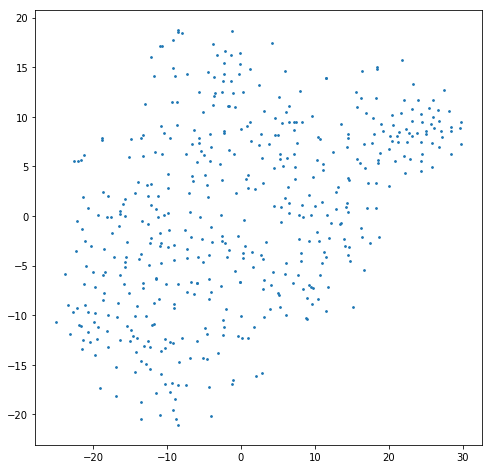

In [6]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=3)
plt.show()

##### Lines embedding in one piece of lyric

In [28]:
sample_n = 5

sampled = np.random.choice(Doc.corpus, sample_n)

seg = [0]
for i, doc in enumerate(sampled):
    seg.append(seg[i] + len(doc.children))

X = np.zeros([seg[-1], 512])
i = 0
for doc in sampled:
    for child in doc.children:
        X[i] = child.to_vec()
        i += 1

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(126, 2)

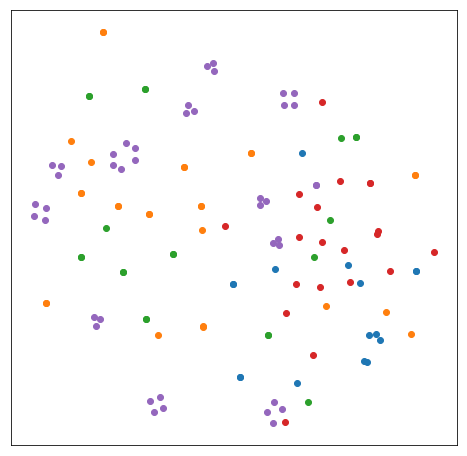

In [29]:
for i in range(sample_n):
    plt.xticks([],[])
    plt.yticks([],[])

    plt.scatter(X_embedded[seg[i]:seg[i+1], 0], X_embedded[seg[i]:seg[i+1], 1])

plt.show()

##### Similarity matrix of lines in sampled_n lyrics

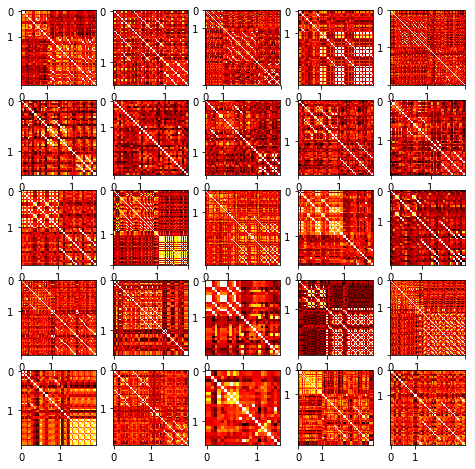

In [33]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    
    sample_n = 2

    sampled = np.random.choice(Doc.corpus, sample_n)

    seg = [0]
    for i, doc in enumerate(sampled):
        seg.append(seg[i] + len(doc.children))

    X = np.zeros([seg[-1], 512])
    i = 0
    for doc in sampled:
        for child in doc.children:
            X[i] = child.to_vec()
            i += 1

    plt.xticks(seg, range(sample_n))
    plt.yticks(seg, range(sample_n))
    plt.imshow(X.dot(X.T), cmap='hot')

In [54]:
from Lyrics.topic.topic import lda, find_topic

In [35]:
ldamodel = lda([doc.bag for doc in Doc.corpus], 10)

In [38]:
ldamodel.print_topics(10, 20)

[(0,
  '0.011*"草原" + 0.011*"中国" + 0.007*"听听" + 0.007*"月亮" + 0.006*"太阳" + 0.006*"歌唱" + 0.005*"地方" + 0.005*"姑娘" + 0.005*"主席" + 0.005*"就是" + 0.004*"远方" + 0.004*"情歌" + 0.004*"故乡" + 0.004*"歌声" + 0.004*"梦想" + 0.004*"身旁" + 0.004*"祖国" + 0.004*"燃烧" + 0.003*"人民" + 0.003*"花儿"'),
 (1,
  '0.005*"朋友" + 0.005*"只有" + 0.005*"亲爱" + 0.004*"一点" + 0.004*"孤独" + 0.004*"走过" + 0.004*"放手" + 0.004*"青春" + 0.004*"变成" + 0.004*"伤心" + 0.004*"如何" + 0.003*"付出" + 0.003*"自由" + 0.003*"尽头" + 0.003*"可是" + 0.003*"理由" + 0.003*"孤单" + 0.003*"注定" + 0.003*"留下" + 0.003*"如今"'),
 (2,
  '0.015*"妈妈" + 0.005*"兄弟" + 0.005*"故事" + 0.004*"开心" + 0.004*"爱人" + 0.004*"爸爸" + 0.003*"如何" + 0.003*"仍然" + 0.003*"恋爱" + 0.003*"然后" + 0.003*"伤心" + 0.003*"终于" + 0.003*"祝愿" + 0.003*"应该" + 0.002*"相思" + 0.002*"英雄" + 0.002*"声音" + 0.002*"看到" + 0.002*"月光" + 0.002*"人生"'),
 (3,
  '0.013*"女人" + 0.010*"男人" + 0.008*"喜欢" + 0.006*"朋友" + 0.006*"这里" + 0.005*"老婆" + 0.005*"音乐" + 0.004*"情歌" + 0.004*"你们" + 0.004*"感情" + 0.004*"就是" + 0.003*"天天" + 0.003*"那里" + 0.003*"分钟" + 0.0

In [56]:
run ../topic/topic.py

In [85]:
Doc.corpus[3333].children[24].bag

['一瞬间', '蒸发']

In [68]:
print(find_topic([doc.text for doc in Doc.corpus],"kmeans",20, vec_model = "tfidf"))

Topic 0:一一 | 一万 | 一下 | 一下子 | 一不小心 | 一个个 | 一二三 | 一二三四 | 一些 | 一体 | 一再 | 一刹那 | 一刻 | 一千 | 一半 | 一双双 | 一声声 | 一天到晚 | 一天天 | 一如既往 | 一字一句 | 一定 | 一幕幕 | 一年四季 | 一并 | 一度 | 一张张 | 一心 | 一心一意 | 一息间 | 一手 | 一整夜 | 一整天 | 一整片 | 一旁 | 一无所有 | 一旦 | 一时 | 一望无边 | 一望无际 | 一朝 | 一次次 | 一步步 | 一段段 | 一点 | 一点一滴 | 一点点 | 一片片 | 一片空白 | 一生一世 | 一番 | 一百 | 一瞬 | 一瞬间 | 一线 | 一绪 | 一群群 | 一致 | 一见钟情 | 一角 | 一路 | 一身 | 一转眼 | 一辈子 | 一边 | 一道 | 一道道 | 一阵 | 一阵阵 | 一面 | 一颗颗 | 一齐 | 丁小毛 | 七彩 | 七月 | 七色 | 万一 | 万万 | 万事 | 万事如意 | 万众 | 万分之一 | 万千 | 万古 | 万水 | 万水千山 | 万物 | 万语千言 | 万里河山 | 丈量 | 三千 | 三四 | 三日 | 三月 | 三枝夕 | 三浦 | 三生石 | 三百六十五 | 三言两语 | 上下 | 上前 | 上升 | 上天 | 上帝 | 上手 | 上海 | 上海滩 | 上演 | 上空 | 上街 | 上衣 | 上课 | 上面 | 下午 | 下去 | 下定决心 | 下山 | 下次 | 下班 | 下载 | 下辈子 | 下雨 | 下雨天 | 下雪 | 下面 | 不可一世 | 不可思议 | 不由自主 | 不知不觉 | 不闻不问 | 不顾一切 | 与众不同 | 专属 | 专心 | 专注 | 专集 | 世上 | 世事 | 世人 | 世代 | 世俗 | 世纪 | 世间 | 丘比特 | 东京 | 东南西北 | 东方 | 东西 | 东风 | 丝丝 | 両手 | 丢下 | 丢失 | 丢掉 | 两三 | 两地 | 两极 | 两端 | 两边 | 严肃 | 严重 | 丧失 | 个个 | 个中 | 个人 | 个什 | 个性 | 中午 | 中华 | 中原 | 中国 | 中央 | 中学 | 中文版 | 中间 | 丰富 | 临别 | 临时 | 临行 | 为什 